In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
fbi = pd.read_excel('C:/Users/marwi/OneDrive/Desktop/t_direct/new_york.xls', skiprows=4)

In [3]:
fbi

,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Yonkers,199134.0,1036.0,6.0,NaN,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0,10.0
347,Yorktown Town,36643.0,15.0,0.0,NaN,0.0,2.0,13.0,334.0,45.0,287.0,2.0,NaN
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fbi.drop([348,349,350], axis=0, inplace=True)

In [5]:
fbi.tail()

,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
343,Woodbury Town,10685.0,3.0,0.0,NaN,0.0,2.0,1.0,541.0,9.0,529.0,3.0,NaN
344,Woodridge Village,829.0,7.0,0.0,NaN,0.0,0.0,7.0,17.0,8.0,9.0,0.0,0.0
345,Woodstock Town,5931.0,2.0,0.0,NaN,0.0,0.0,2.0,58.0,13.0,45.0,0.0,NaN
346,Yonkers,199134.0,1036.0,6.0,NaN,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0,10.0
347,Yorktown Town,36643.0,15.0,0.0,NaN,0.0,2.0,13.0,334.0,45.0,287.0,2.0,NaN


In [6]:
fbi.drop(fbi.columns[4], axis=1, inplace=True)
fbi.head()

,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [7]:
fbi.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'Property', 'Burglary', 'Larcen', 'AutoTheft', 'Arson']
fbi.head()

,City,Population,ViolentCrime,Murder,Rape2,Robbery,AggAssault,Property,Burglary,Larcen,AutoTheft,Arson
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [8]:
fb2 = pd.DataFrame(data=fbi, columns=['City', 'Population', 'Murder', 'Robbery', 'Property'])
fb2

,City,Population,Murder,Robbery,Property
0,Adams Village,1861.0,0.0,0.0,12.0
1,Addison Town and Village,2577.0,0.0,0.0,24.0
2,Akron Village,2846.0,0.0,0.0,16.0
3,Albany,97956.0,8.0,227.0,4090.0
4,Albion Village,6388.0,0.0,4.0,223.0
...,...,...,...,...,...
343,Woodbury Town,10685.0,0.0,2.0,541.0
344,Woodridge Village,829.0,0.0,0.0,17.0
345,Woodstock Town,5931.0,0.0,0.0,58.0
346,Yonkers,199134.0,6.0,390.0,2368.0


In [9]:
fb2['Pop_Sqr'] = fb2['Population'] ** 2
fb2.head()

,City,Population,Murder,Robbery,Property,Pop_Sqr
0,Adams Village,1861.0,0.0,0.0,12.0,3.463321e+06
1,Addison Town and Village,2577.0,0.0,0.0,24.0,6.640929e+06
2,Akron Village,2846.0,0.0,0.0,16.0,8.099716e+06
3,Albany,97956.0,8.0,227.0,4090.0,9.595378e+09
4,Albion Village,6388.0,0.0,4.0,223.0,4.080654e+07


In [10]:
def func_cat(x): 
    if x > 0: 
        return 1 
    else: 
        return 0

In [11]:
fb2['Robbery_cat'] = fb2['Robbery'].apply(func_cat)
fb2['Murder_cat'] = fb2['Murder'].apply(func_cat)

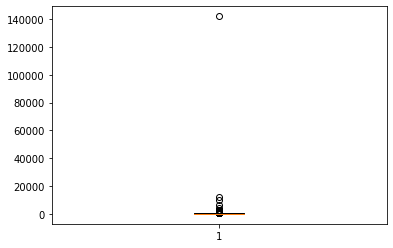

In [12]:
plt.boxplot(fb2.Property)
plt.show()

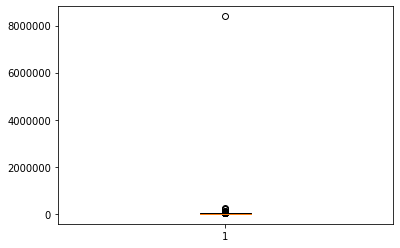

In [13]:
plt.boxplot(fb2.Population)
plt.show()

In [14]:
fb2.sort_values('Property', ascending=False)

,City,Population,Murder,Robbery,Property,Pop_Sqr,Robbery_cat,Murder_cat
216,New York,8396126.0,335.0,19170.0,141971.0,7.049493e+13,1,1
35,Buffalo,258789.0,47.0,1322.0,12491.0,6.697175e+10,1,1
272,Rochester,210562.0,42.0,918.0,10051.0,4.433636e+10,1,1
310,Syracuse,143834.0,21.0,400.0,6473.0,2.068822e+10,1,1
3,Albany,97956.0,8.0,227.0,4090.0,9.595378e+09,1,1
...,...,...,...,...,...,...,...,...
295,Shortsville Village,1437.0,0.0,0.0,0.0,2.064969e+06,0,0
208,New Berlin Town,1622.0,0.0,0.0,0.0,2.630884e+06,0,0
319,Tuxedo Park Village,615.0,0.0,0.0,0.0,3.782250e+05,0,0
256,Port Byron Village,1274.0,0.0,0.0,0.0,1.623076e+06,0,0


In [15]:
fb2.sort_values('Population', ascending=False)

,City,Population,Murder,Robbery,Property,Pop_Sqr,Robbery_cat,Murder_cat
216,New York,8396126.0,335.0,19170.0,141971.0,7.049493e+13,1,1
35,Buffalo,258789.0,47.0,1322.0,12491.0,6.697175e+10,1,1
272,Rochester,210562.0,42.0,918.0,10051.0,4.433636e+10,1,1
346,Yonkers,199134.0,6.0,390.0,2368.0,3.965435e+10,1,1
310,Syracuse,143834.0,21.0,400.0,6473.0,2.068822e+10,1,1
...,...,...,...,...,...,...,...,...
44,Cape Vincent Village,762.0,0.0,0.0,2.0,5.806440e+05,0,0
12,Asharoken Village,658.0,0.0,0.0,2.0,4.329640e+05,0,0
136,Hammondsport Village,656.0,0.0,0.0,10.0,4.303360e+05,0,0
319,Tuxedo Park Village,615.0,0.0,0.0,0.0,3.782250e+05,0,0


In [16]:
fb2.drop([216, 35, 272, 346, 310, 3], inplace=True)

In [17]:
fb2.sort_values('Population', ascending=False)

,City,Population,Murder,Robbery,Property,Pop_Sqr,Robbery_cat,Murder_cat
7,Amherst Town,118296.0,1.0,31.0,2118.0,1.399394e+10,1,1
126,Greece Town,96667.0,0.0,60.0,2303.0,9.344509e+09,1,0
267,Ramapo Town,87204.0,2.0,9.0,567.0,7.604538e+09,1,1
57,Clarkstown Town,80705.0,0.0,17.0,1515.0,6.513297e+09,1,0
214,New Rochelle,78800.0,0.0,81.0,1391.0,6.209440e+09,1,0
...,...,...,...,...,...,...,...,...
44,Cape Vincent Village,762.0,0.0,0.0,2.0,5.806440e+05,0,0
12,Asharoken Village,658.0,0.0,0.0,2.0,4.329640e+05,0,0
136,Hammondsport Village,656.0,0.0,0.0,10.0,4.303360e+05,0,0
319,Tuxedo Park Village,615.0,0.0,0.0,0.0,3.782250e+05,0,0


In [18]:
regr = linear_model.LinearRegression()
x = fb2[['Population', 'Pop_Sqr', 'Robbery_cat', 'Murder_cat']]
y = fb2['Property']
regr.fit(x, y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print('R-Squared: ', regr.score(x, y))

Coefficients:  [ 2.10505189e-02 -3.81143405e-09  5.65577132e+01  1.55025675e+02]
Intercept:  -48.37899610073799
R-Squared:  0.7287351545655776


In [19]:
linear_formula = 'Property ~ Population+Pop_Sqr+Robbery_cat+Murder_cat'
lm = ols(formula=linear_formula, data=fb2).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           4.16e-94
Time:                        19:01:27   Log-Likelihood:                -2358.8
No. Observations:                 342   AIC:                             4728.
Df Residuals:                     337   BIC:                             4747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -48.3790     22.347     -2.165      0.031     -92.335      -4.423
Population      0.0211      0.002      9.537      0.000       0.017       0.025
Pop_Sqr     -3.811e-09   2.54e-08     -0.150      0.881   -5.38e-08    4.62e-08
Robbery_cat    56.5577     31.580      1.791      0.074      -5.562     118.677
Murder_cat    155.0257     45.271      3.424      0.001      65.976     244.076
==============================================================================
Omnibus:                      171.926   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3187.115
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                      17.598   Cond. No.                     4.91e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Property = -48.379 + (0.0211xPopulation) + (-3.811e-09xPop_Sqr) + (56.5xRobbery_cat) + (155xMurder_cat) 

The R-squared was at .996 before I dropped a few rows based on outliers in population size and property crimes that interfered with the models performance due to biased conditions in certain cities. This reduced the r-square to 0.729 which expresses that the model can provide more realistic representation but not so perfect predictions of property crimes. The intercept at -48.379 represents that there are significant factors to predict the possibility for property crime. The population and pop_sqr coefficients show that significantly sized populations have a higher likelyhood for property crime even if there are no murders or robberies. The robbery and murder coefficients show that cities with murders are nearly three times more likely to have property crime than cities with robbery. But cities with at least one robbery reported per year are likely to have at least one property crime. 

## Challenge: Validating a linear regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(regr.fit(x, y).score(x, y)))
cross_val_score(regr, x, y, cv=10)

20% Holdout: 0.692080348304581
Sample: 0.7287351545655776


array([0.72850307, 0.83356534, 0.30272004, 0.79504015, 0.75360791,
       0.74502253, 0.55992604, 0.18130509, 0.71542474, 0.7405865 ])

In [22]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print('R-Squared: ', regr.score(x, y))

Coefficients:  [ 2.10505189e-02 -3.81143405e-09  5.65577132e+01  1.55025675e+02]
Intercept:  -48.37899610073799
R-Squared:  0.7287351545655776


With the current model we see consistent score above 72% that peaks at 83%. The only problem I see within the folds is that there are three folds far below 70% at 56%, 30%, and 18%. Otherwise there are consistent scores but a significant difference between the holdout at 69% and the sample at 73% with 7/10 scores in the cross validation above 70%. Also, the p-value for 'Pop_Sqr' is the highest at 0.88 meaning it is highly probable that it is not effective in predicting property crimes while Population and Murder_cat have the lowest p-values indicating that they are effective features to predict property crime. Now I will test three more models without 'Pop_Sqr' and either 'Murder_cat' or 'Robbery_cat' included to see how the resulting scores compare. 

In [23]:
x1 = fb2[['Population', 'Murder_cat', 'Robbery_cat']]
x2 = fb2[['Population', 'Murder_cat']]
x3 = fb2[['Population', 'Robbery_cat']]
reg1 = regr.fit(x1, y)
reg2 = regr.fit(x2, y)
reg3 = regr.fit(x3, y)

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2)
print('20% Holdout: ' + str(reg1.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(reg1.fit(x1, y).score(x1, y)))
cross_val_score(reg1, x1, y, cv=10)

20% Holdout: 0.689882619852414
Sample: 0.7287170387010331


array([0.78673582, 0.84289577, 0.30830704, 0.80727477, 0.75492328,
       0.75224285, 0.56013174, 0.2142248 , 0.71755778, 0.74049526])

In [24]:
linear_formula = 'Property ~ Population+Robbery_cat+Murder_cat'
lm1 = ols(formula=linear_formula, data=fb2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     302.6
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.23e-95
Time:                        19:01:28   Log-Likelihood:                -2358.8
No. Observations:                 342   AIC:                             4726.
Df Residuals:                     338   BIC:                             4741.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -47.1798     20.838     -2.264      0.024     -88.168      -6.192
Population      0.0208      0.001     22.303      0.000       0.019       0.023
Robbery_cat    58.1607     29.675      1.960      0.051      -0.210     116.531
Murder_cat    155.9627     44.773      3.483      0.001      67.893     244.032
==============================================================================
Omnibus:                      172.181   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3226.304
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                      17.692   Cond. No.                     7.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For this model I decided to remove the 'Pop_Sqr' feature and we can see a slight improvement by 1-2% across most of the scores. The Sample score is constant while the holdout is roughly lower but still at 69%. The lowest fold increased to 21% and peaking at 84%. The coefficients also increased by nearly '1' and the R^2 values remained the same. But the p-values are much better overall with Robbery_cat at the threshold of 0.05 compared to 0.07 of the previous model with Pop_Sqr.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2)
print('20% Holdout: ' + str(reg2.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(reg2.fit(x2, y).score(x2, y)))
cross_val_score(reg2, x2, y, cv=10)

20% Holdout: 0.5129807373552615
Sample: 0.725633896898982


array([0.78165473, 0.84232718, 0.26364311, 0.80911875, 0.74075997,
       0.75963517, 0.55572929, 0.19878056, 0.72710049, 0.74228434])

In [26]:
linear_formula = 'Property ~ Population+Murder_cat'
lm2 = ols(formula=linear_formula, data=fb2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     448.3
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           6.27e-96
Time:                        19:01:28   Log-Likelihood:                -2360.7
No. Observations:                 342   AIC:                             4727.
Df Residuals:                     339   BIC:                             4739.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.6486     16.730     -1.354      0.177     -55.556      10.258
Population     0.0214      0.001     24.487      0.000       0.020       0.023
Murder_cat   165.9532     44.668      3.715      0.000      78.091     253.815
==============================================================================
Omnibus:                      164.606   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3036.565
Skew:                           1.527   Prob(JB):                         0.00
Kurtosis:                      17.274   Cond. No.                     7.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### For this model we only used the two features 'Population' and 'Murder_cat' which resulted in very similar scores to the previous model. The most notable change is that the holdout is 10% higher than the sample score. The intercept coefficient reduced to -22.6 and the Murder_cat increased from 155.9 to 165.9 while the Population remained consistent at 0.02. But, even though the p-values for the Population and Murder_cat are zero, the Intercept has a p-value of 0.177 which is strange it not a good predictor for property crime.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.2)
print('20% Holdout: ' + str(reg3.fit(X_train, y_train).score(X_test, y_test)))
print('Sample: ' + str(reg3.fit(x3, y).score(x3, y)))
cross_val_score(reg3, x3, y, cv=10)

20% Holdout: 0.7930233134491089
Sample: 0.7189782343773337


array([0.76336455, 0.86644389, 0.47468619, 0.81326322, 0.72878961,
       0.70167015, 0.52757819, 0.2706578 , 0.71656502, 0.72098163])

In [28]:
linear_formula = 'Property ~ Population+Robbery_cat'
lm3 = ols(formula=linear_formula, data=fb2).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     433.7
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           3.64e-94
Time:                        19:01:29   Log-Likelihood:                -2364.8
No. Observations:                 342   AIC:                             4736.
Df Residuals:                     339   BIC:                             4747.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -51.9179     21.132     -2.457      0.015     -93.484     -10.352
Population      0.0220      0.001     25.377      0.000       0.020       0.024
Robbery_cat    69.9289     29.962      2.334      0.020      10.994     128.864
==============================================================================
Omnibus:                      190.104   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3674.853
Skew:                           1.863   Prob(JB):                         0.00
Kurtosis:                      18.620   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The last model consists of the two features 'Population' and 'Robbery_cat' with similar resulting scores for cross validation and the holdout score is 7% higher than the sample score. The intercept coefficient reduced slightly less than the original models from -48 to -51 with the Robbery_cat increasing from roughly 58 to 69 in this model. Overall, I feel that the best model was the last because the p-values for the intercept, Population, and Robbery_cat are within a decent range below 0.05 compared to the other models.

## Comparing the lm3 model with the FBI dataset for Florida

In [29]:
fl = pd.read_excel('C:/Users/marwi/OneDrive/Desktop/t_direct/fbi_florida.xls', skiprows=4)

fl.drop([290,291,292], axis=0, inplace=True)
fl.drop(fl.columns[5], axis=1, inplace=True)

fl.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape', 'Robbery', 'AggAssault', 'Property', 'Burglary', 'Theft', 'AutoTheft', 'Arson']

In [30]:
fl2 = pd.DataFrame(data=fl, columns=['City', 'Population', 'Murder', 'Robbery', 'Property'])
fl2['Pop_Sqr'] = fl2['Population'] ** 2

def boo_cat(x):
    if x > 0:
        return 1
    else:
        return 0


fl2['Murder_cat'] = fl2['Murder'].apply(boo_cat)
fl2['Robbery_cat'] = fl2['Robbery'].apply(boo_cat)
fl2.head()

,City,Population,Murder,Robbery,Property,Pop_Sqr,Murder_cat,Robbery_cat
0,Alachua,9338.0,0.0,2.0,166.0,8.719824e+07,0,1
1,Altamonte Springs,42040.0,0.0,37.0,1564.0,1.767362e+09,0,1
2,Altha,536.0,0.0,0.0,3.0,2.872960e+05,0,0
3,Apalachicola,2269.0,0.0,0.0,35.0,5.148361e+06,0,0
4,Apopka,45397.0,1.0,57.0,1527.0,2.060888e+09,1,1


In [31]:
fl2.drop([62, 107, 158, 257], inplace=True)

In [32]:
X_Fl = fl2[['Population', 'Robbery_cat']]
y_true = fl2['Property']
y_pred = lm3.predict(X_Fl)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.5776130900385039

After cleaning up the crime dataset for Florida I decided to use the 'r2_score' method to check how the lm3 model performs with this dataset. With the R^2 dropping significantly from 0.719 to 0.577, we can see that the model is biased towards the New York data and it is NOT a good model to use with the Florida data and highly likely not usable for the other states in the FBI crime database.